In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


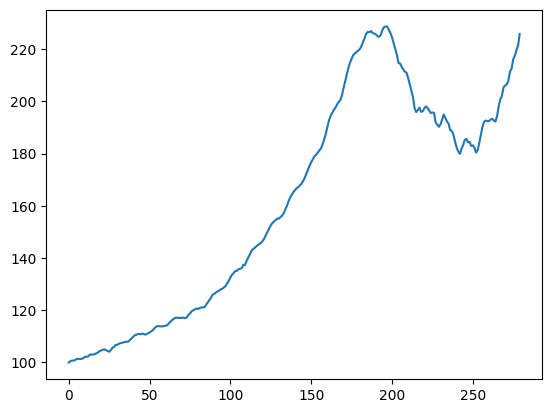

In [ ]:
df=pd.read_csv('enhanced_monthly_housing.csv')
df['hpi'].plot()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
features = ['hpi', 'numsold', 'inflation_rate', 'interest_rate', 'gdp_growth_rate']
target = 'hpi'

<Axes: >

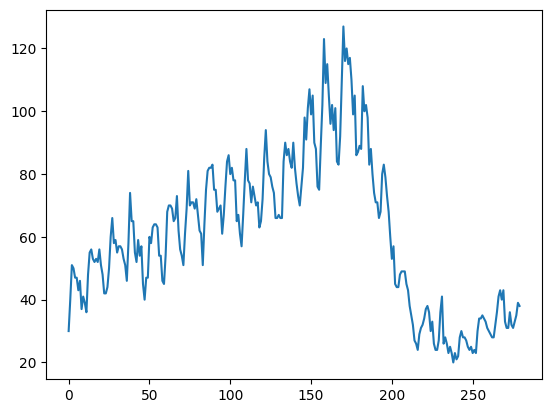

In [ ]:
df['numsold'].plot()

<Axes: >

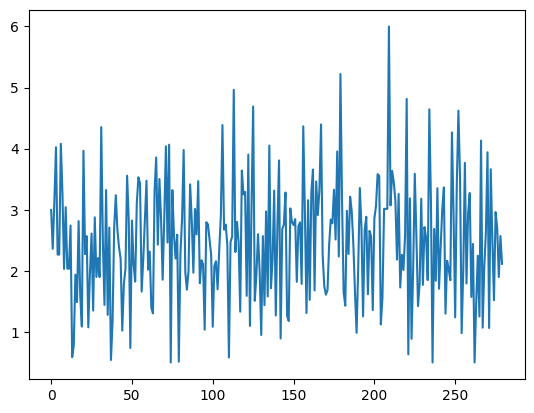

In [ ]:
df['inflation_rate'].plot()

<Axes: >

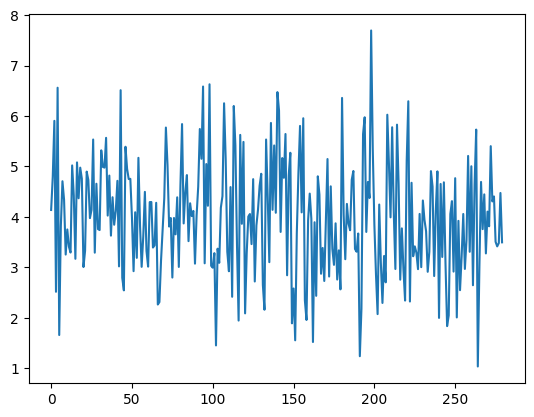

In [ ]:
df['interest_rate'].plot()

<Axes: >

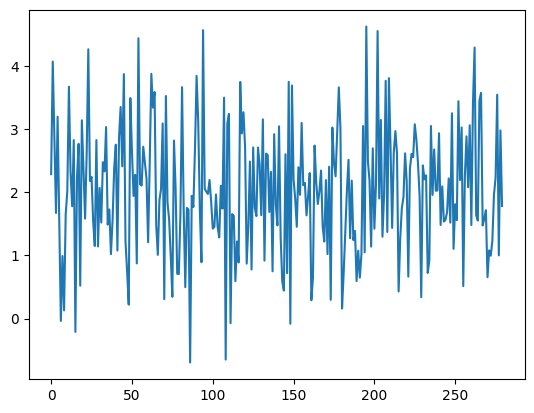

In [ ]:
df['gdp_growth_rate'].plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_train=df.iloc[0:269,1:6]
training_set_scaled = sc.fit_transform(dataset_train)
training_set_scaled

array([[0.        , 0.09345794, 0.45394803, 0.46575084, 0.56042614],
       [0.00372931, 0.18691589, 0.3384974 , 0.56459074, 0.89548636],
       [0.00574936, 0.28971963, 0.48139792, 0.73104095, 0.66951237],
       ...,
       [0.76186776, 0.19626168, 0.66043842, 0.54926632, 0.80244758],
       [0.78369979, 0.21495327, 0.10361066, 0.40871791, 0.40794089],
       [0.79286769, 0.18691589, 0.28362828, 0.51216601, 0.4272068 ]])

In [ ]:
X_train = []
y_train = []
for i in range(12, 269):
    X_train.append(training_set_scaled[i-12:i,:])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(64, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(64))
regressor.add(Dropout(0.2))
regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 12, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 12, 64)         │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,729 (288.00 KB)

 Trainable params: 73,729 (288.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1553
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0511
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0208
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0067
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0064
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0065
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0044
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0050
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0048
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0052
Epoch 13/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047
Epoch 14/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0043
Epoch 15/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027
Epoch 16/150
9/9 ━━

In [ ]:
dataset_test = pd.read_csv('enhanced_monthly_housing.csv')
real_stock_price = dataset_test.iloc[269:282, 1:6].values

In [ ]:
dataset_total = pd.concat((dataset_train, dataset_test), axis=0)

inputs = dataset_total[features].values
inputs = sc.transform(inputs)

inputs = inputs[len(inputs) - len(dataset_test) - 12:]

X_test = []
for i in range(12, inputs.shape[0]):
    X_test.append(inputs[i - 12:i])

X_test = np.array(X_test)

predicted_hpi = regressor.predict(X_test)

pad_predictions = np.zeros((predicted_hpi.shape[0], 5))
pad_predictions[:, 0] = predicted_hpi[:, 0]

predicted_hpi_rescaled = sc.inverse_transform(pad_predictions)[:, 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step


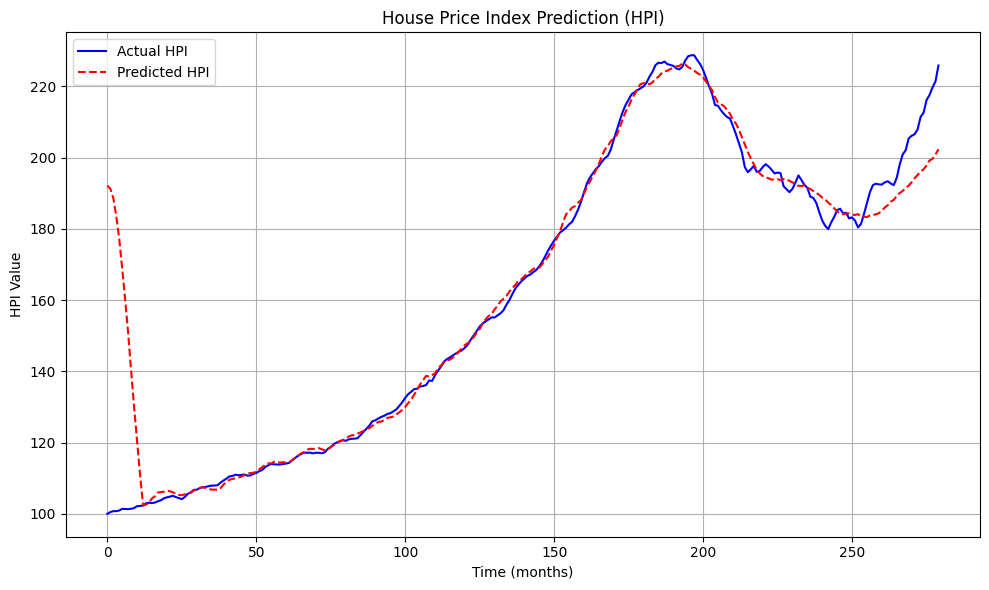

In [ ]:
actual_hpi = dataset_test['hpi'].values[:len(predicted_hpi_rescaled)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(actual_hpi, color='blue', label='Actual HPI')
plt.plot(predicted_hpi_rescaled, color='red', linestyle='--', label='Predicted HPI')
plt.title('House Price Index Prediction (HPI)')
plt.xlabel('Time (months)')
plt.ylabel('HPI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()